# Putting the Pandemic into Perspective
## <font color='slategray'>Addressing COVID-19 Misinformation Using Python Basics (and Reason)</font>
**<font color='slategray'>Anne Bode</font>**

### **<font color='firebrick'>The Misinformation</font>**
1. "COVID-19 is all hype...the scary models in the beginning were totally wrong."
2. "The cure is worse than the disease"
3. "COVID-19 is just like the flu"

### **<font color='seagreen'>The Tools to Bring Perspective</font>**
1. **Worst Case Scenario Calculator**: plug in your own population, R0, and mortality rate to estimate total deaths in a worst case scenario
2. **Charting Cause of Death**: simple bar chart showing the annual mortality from leading causes
3. **Flu vs. COVID-19 Charts**: simple bar charts showing flu stats vs. COVID-19 stats
4. **Animated Disease Spread** visualize the spread of a disease with different days infectious and mortality rates using matplotlib

**____________________________________________________________________________________________________________________________**

##  1. "COVID-19 is all hype...the scary models in the beginning were totally wrong."

### <font color=royalblue> Background </font>

On March 16th 2020, Imperial College's Professor Neil Ferguson released a **[COVID-19 mortality model](https://spiral.imperial.ac.uk:8443/bitstream/10044/1/77482/14/2020-03-16-COVID19-Report-9.pdf)** that estimated under the WORST CASE scenario, with ZERO precautions taken, the UK would lose 550k people to the virus, and the USA 2.2 million. This shocked the world into action.

However, in this same publication, the Imperial team provides tables demonstrating expected number of deaths under situations where precautions ARE in fact taken. These include "case isolation, home quarantine, social distancing, and school/university closure." With these precautions in place, the estimated deaths in the UK drop DRASTICALLY to a range of 5.6k - 48k over two years. As of 12/3/20, ~60k people in the UK have died from COVID-19. So, like any decent (though of course imperfect) model, the reality fell somewhere between the best and worst case scenarios.

As the month passed, Professor Ferguson and team made edits to the model as new facts came to light (note: this was before we even had testing!). Certain elements of the media were swift to jump on any modifications to the model, claiming that these changes meant the whole model was wrong and should be dismissed and consequently COVID-19 no longer poses a credible threat. The WSJ's Editorial Board wrote an **[op-ed](https://www.wsj.com/articles/worst-case-coronavirus-science-11585351059)** that accurately argued:
    
    "Critics are bashing him for the revisions, but not so fast. Mr. Ferguson didn’t change his model so much as adjust for new circumstances. In particular he believes that Covid-19 is more transmissible than he previously had thought—but 
    because strong measures had been implemented, deaths would be far lower than his worst-case scenario. There’s a warning here about science and journalism. Surely if we hope to neutralize a pandemic we don’t fully understand, we need to 
    encourage a culture in which scientists feel able to adapt and clarify with new evidence."

So yes, scientists and mathematicians will tweak the assumptions they feed into their models as new information comes to light. **But the idea that the initial worst case scenario was wrong by "orders of magnitude," as some allege, is a complete miscomprehension of the fact that the PUBLICATION of the model itself was in part responsible for the (multiple) lockdowns the UK put in place, which by default reduced the likelihood that the outcome would resemble the model's worst case 550k figure.**

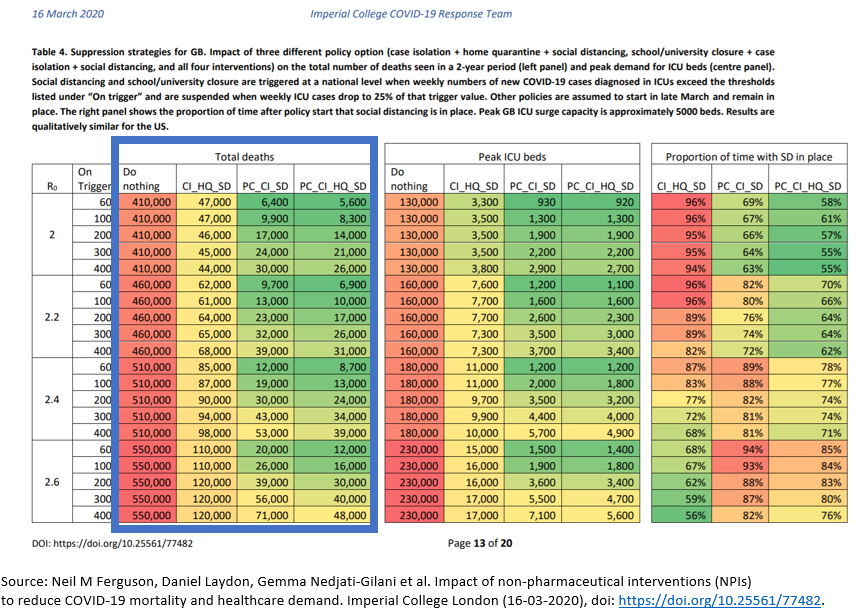

### <font color=darkcyan> Tool #1: Worst Case Scenario Calculator </font>

We can even demonstrate that the worst case scenario is not THAT far off base by using an overly simplified (and highly theoretical) estimate of a worst case death total. How? By plugging in an estimated population, R0 value, and estimated mortality rate. With these three inputs we can calculate: estimated herd immunity rate, estimated number of people infected, and estimated number of deaths.

**R0 ("r-naught")**:
* The number of people (on average) an infected person will infect; represents how contagious a disease is
* Current [best estimate from the CDC](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html) is 2.5

**Mortality Rate**:
* While the mortality rate of COVID-19 is difficult to gauge, given advances in treatment since the start of the pandemic, [one recent estimate is 0.6%](https://www.reuters.com/article/us-health-coronavirus-fatality/covid-19-fatality-rate-down-30-since-april-study-finds-idUSKBN27S39D)

**Population**:
* Current estimate of the US population is 328,200,000

**Herd Immunity Rate**:
* Per the [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/herd-immunity-and-coronavirus/art-20486808), *"Herd immunity occurs when a large portion of a community (the herd) becomes immune to a disease, making the spread of disease from person to person unlikely. As a result, the whole community becomes protected — not just those who are immune."*
* [How to estimate herd immunity](https://www.healthknowledge.org.uk/e-learning/epidemiology/specialists/epidemic-theory): 1 - (1/R0) 

In [1]:
def predict_deaths():
    
    ''' 
    ask for user to input population, r0, and mortality rate
    returns tuple of herd immunity level, est. number of people infect, est. number of deaths
    '''

    population = int(input("Type in population size (without commas): "))
    R0 = float(input("Type in estimated R0: "))
    mortality_rate = float(input("Type in estimated mortality rate (in decimal format i.e. 1% = 0.01): "))
    
    herd_immunity_rate = (1 - (1/R0))
    infected = herd_immunity_rate * population
    deaths = mortality_rate * infected
    
    print('\n')
    print('Estimated Herd Immunity Rate = ' + str(herd_immunity_rate*100) + '%',
          'Estimated Total Infections = ' + str('{:,}'.format(int(infected))),
          'Estimated Total Deaths = ' + str('{:,}'.format(int(deaths))),
          sep="\n")

#### Calculation using current best estimates

1. Population = USA population of 328,200,000
2. R0 = CDC's best estimate of 2.5
3. Mortality Rate = recent estimate of 0.6%

In [2]:
predict_deaths()

Type in population size (without commas): 328200000
Type in estimated R0: 2.5
Type in estimated mortality rate (in decimal format i.e. 1% = 0.01): .006


Estimated Herd Immunity Rate = 60.0%
Estimated Total Infections = 196,920,000
Estimated Total Deaths = 1,181,520


#### Calculation using mortality rate based off of confirmed cases and deaths in the USA on 12/3
Mortality Rate = 273518 / 13,999,300 = 1.95%

Note this mortality rate is clearly too high, as we do not accurately know ALL COVID-19 cases (particularly asymptomatic ones), but I include it as a rough estimate of what little we knew in March, when the initial models were created.

In [3]:
predict_deaths()

Type in population size (without commas): 328200000
Type in estimated R0: 2.5
Type in estimated mortality rate (in decimal format i.e. 1% = 0.01): .0195


Estimated Herd Immunity Rate = 60.0%
Estimated Total Infections = 196,920,000
Estimated Total Deaths = 3,839,940


#### Try it with your own estimates! Click inside the cell below and then hold down "Shift + Enter"

In [ ]:
predict_deaths()

**__________________**

## 2. "The cure is worse than the disease"

### <font color=royalblue> Background </font>

**As of 12/3/20, >270k Americans have died from COVID-19.  Despite this fact, in the United States debates rage over whether COVID-19 even poses a real threat (see part 1, above). If 2018 trends ([per the CDC](https://www.cdc.gov/nchs/fastats/leading-causes-of-death.htm)) hold relatively stable in 2020, COVID-19 is already the third most common cause of death in 2020, after Heart Disease and Cancer.**

**A common talking point against "lockdowns" is that we "can't let the cure be worse than the disease."** The point here is that the increase in poverty and drug overdoses as a result of prolonged economic shutdowns outweighs the benefit of slowing the spread of COVID-19. To be clear: an increase in poverty and/or overdoses is devastating for the nation and specifically for the communities impacted. Measures must be taken to address the awful side effects of the pandemic and its associated policy responses. However, I hope to illustrate that the cure is NOT worse than the disease, because the disease is pretty dang bad.

**On poverty**: It seems reasonable to suggest that nations were faced with two options to avoid a spike in poverty in 2020. 1) Nations could keep their economies open, let the virus rip through their populations, and hope citizens continue to venture out of the house despite mounting deaths. 2) Nations could shut their economies down (in targeted locations, when possible) and use government resources to support the unemployed. With proper government stimulus (akin to the [CARES Act](https://www.npr.org/2020/03/26/821457551/whats-inside-the-senate-s-2-trillion-coronavirus-aid-package)) we might reasonably hope to mitigate a severe increase in poverty. What if a nation chose neither path? We will see what happens in the United States in the absence of a second stimulus bill. Already, government inaction paired with spotty economic lockdowns has led to a [stark rise in poverty](https://www.nbcnews.com/news/us-news/8-million-americans-slipped-poverty-amid-coronavirus-pandemic-new-study-n1243762). 

Although deaths from poverty can be difficult to ascertain, [one study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3134519/) of deaths in 2000 concluded that 133,000 deaths could be attributed to "individual-level poverty" and 39,000 to "area-level" poverty. Taken together, these numbers clearly indicate that deaths as a result of poverty are a massive issue (at pandemic levels in their own right) facing our nation. Fortunately (or perhaps, in some nations mired in gridlock, unfortunately), a nation's government has the power to directly address the pandemic of poverty.

**On overdoses:** Overdoses, the majority of which are due to opioid use, are quite appropriately referred to as an epidemic in  the U.S. [According to the CDC](https://www.cdc.gov/drugoverdose/epidemic/index.html), between 1999 and 2018 (a 20 year period), approximately 450k Americans died from an opioid overdose. In 2018, the number of total drug overdoses was 67,367 (same source). These numbers are jarringly high and demand our attention. However, a rise in overdoses as a result of economic shutdowns is statistically HIGHLY unlikely to outnumber the deaths that would occur due to the unfettered spread of COVID-19. Even with periodic lockdowns and other safety measures put in place, >270k Americans have already died from COVID-19 in ~9 months alone (~4x more than overdoses in 2018).

**In summary, the stats clearly illustrate that the threat of COVID-19 is meaningful and warrants policy intervention to attempt to slow the spread of the #3 killer in the USA in 2020. Negative side effects from policy intervention (i.e. lockdowns) include spikes in both poverty and drug overdoses. While these effects demand our attention, a spike in poverty can be directly mitigated by government action and overdoses are greatly outnumbered by COVID-19 deaths. To sum it up: the cure is NOT worse than the disease.**

### <font color=darkcyan> Tool #2: Charting Causes of Death </font>

We'll add the USA mortality stats to a dictionary, which we will convert to a pandas dataframe and chart using seaborn. This will help us put the COVID-19 deaths into better perspective. *Note: all mortality data is as of 2018, except for COVID-19 which is of course YTD 2020.*

In [4]:
import pandas as pd

Mortality_Dict = {
    
    #COVID
    'COVID-19': 273518,
    
    #Other Leading Causes
    'Heart_disease': 655381,
    'Cancer': 599274,
    'Accidents': 167127,
    'Chronic_lower_respiratory_diseases': 159486,
    'Stroke': 147810,
    'Alzheimers': 122019,
    'Diabetes': 84946,
    'Influenza_pneumonia': 59120,
    'Nephritis_nephrotic_nephrosis': 51386,
    'Suicide': 48344,
    
    #Social/Drug causes
    'Total_Poverty': 133000 + 39000,
    'Total Overdoses': 67367
                }

mortality_df = pd.DataFrame.from_dict(Mortality_Dict, orient='index', columns=['Total Deaths'])
mortality_df.sort_values(by='Total Deaths', ascending=False, inplace=True)

mortality_df

,Total Deaths
Heart_disease,655381
Cancer,599274
COVID-19,273518
Total_Poverty,172000
Accidents,167127
Chronic_lower_respiratory_diseases,159486
Stroke,147810
Alzheimers,122019
Diabetes,84946
Total Overdoses,67367


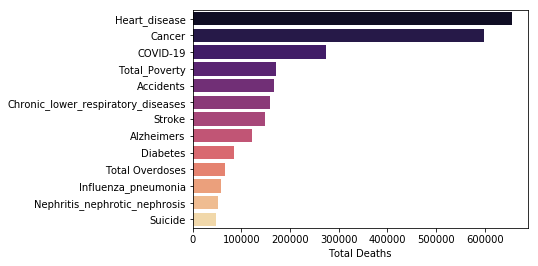

In [6]:
%matplotlib inline

import seaborn as sns

ax = sns.barplot(x='Total Deaths', y=mortality_df.index, data=mortality_df, palette='magma')

**______________**

## 3. "COVID-19 is just like the flu"

### <font color=royalblue> Background #1: Mortality Rates </font>

**Just as more and more people are questioning whether COVID-19 is a credible threat (see part 1), or whether the costs of containing it outweigh the benefits (see part 2), there is a growing population that asserts that COVID-19 is "just like the flu."**

The chart above already illustrated that COVID-19 deaths year-to-date vastly exceed the combined number of deaths caused by both Influenza AND Pneumonia in the full year of 2018. But let's dive deeper, focusing specifically on the flu. We'll use data from the 2019-2020 flu season for this exercise.

[Per the CDC](https://www.cdc.gov/flu/about/burden/2019-2020.html#:~:text=aged%20%3C18%20years.-,Conclusion,405%2C000%20hospitalizations%2C%20and%2022%2C000%20deaths), during the 2019-2020 flu season in the U.S., about 38 million people had the flu and about 22,000 people died of the flu. We'll compare that stat against the latest YTD COVID numbers (13,999,300 people infected; 273,518 people dead as of 12/3/20)

### <font color=darkcyan> Tool #3: Mortality Rates - Flu vs. COVID-19 Charts </font>

In [7]:
flu_covid_dict = {'influenza':{'infected':38000000, 'dead':22000},
                  'COVID19':{'infected':13999300, 'dead':273518}}

flu_covid_df = pd.DataFrame.from_dict(flu_covid_dict,orient='index')

flu_covid_df['Observed Mortality Rate'] = flu_covid_df['dead']/flu_covid_df['infected']
flu_covid_df['Observed Mortality Rate'] = round(flu_covid_df['Observed Mortality Rate'] * 100,2)

flu_infected = flu_covid_df.at['influenza', 'infected']
flu_deaths = flu_covid_df.at['influenza','dead']
covid_infected = flu_covid_df.at['COVID19', 'infected']
covid_deaths = flu_covid_df.at['COVID19','dead']
flu_mortality_rate =  flu_covid_df.at['influenza', 'Observed Mortality Rate']
covid_mortality_rate = flu_covid_df.at['COVID19', 'Observed Mortality Rate']

flu_covid_df

,infected,dead,Observed Mortality Rate
influenza,38000000,22000,0.06
COVID19,13999300,273518,1.95


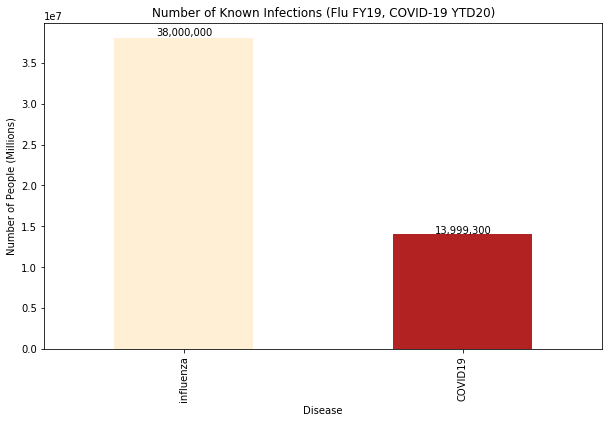

In [8]:
ax = flu_covid_df['infected'].plot(kind='bar', figsize=(10, 6), rot=90, color=['papayawhip','firebrick'])
ax.set_title('Number of Known Infections (Flu FY19, COVID-19 YTD20)')
ax.set_xlabel('Disease')
ax.set_ylabel('Number of People (Millions)')
for p in ax.patches:
    ax.annotate(str('{:,}'.format(p.get_height())), (p.get_x() + .15, p.get_height() * 1.01))

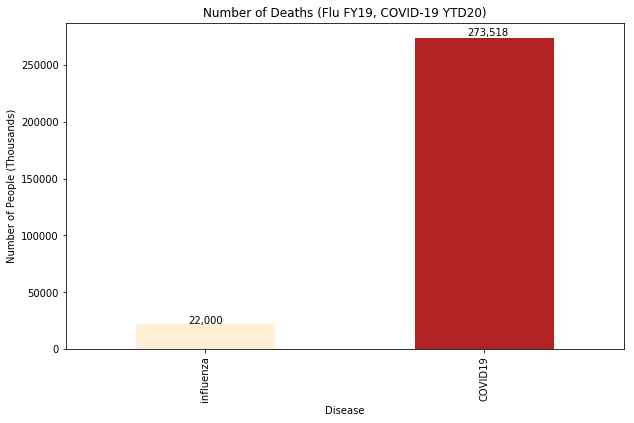

In [9]:
ax = flu_covid_df['dead'].plot(kind='bar', figsize=(10,6),rot=90, color=['papayawhip','firebrick'])
ax.set_title('Number of Deaths (Flu FY19, COVID-19 YTD20)')
ax.set_xlabel('Disease')
ax.set_ylabel('Number of People (Thousands)')
for p in ax.patches:
    ax.annotate(str('{:,}'.format(p.get_height())), (p.get_x() + .19, p.get_height() * 1.01))

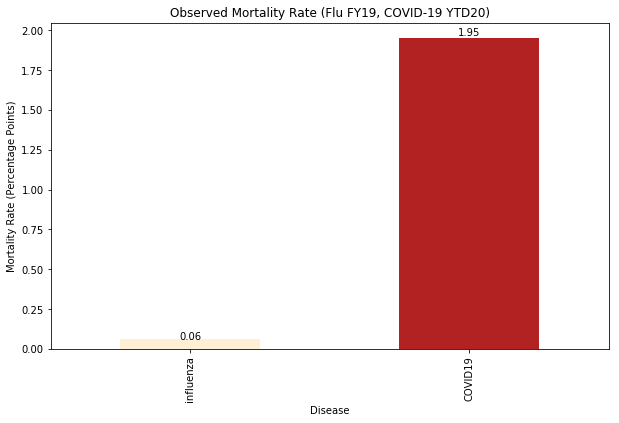

In [10]:
ax = flu_covid_df['Observed Mortality Rate'].plot(kind='bar', figsize=(10, 6), rot=90, color=['papayawhip','firebrick'])
ax.set_title('Observed Mortality Rate (Flu FY19, COVID-19 YTD20)')
ax.set_xlabel('Disease')
ax.set_ylabel('Mortality Rate (Percentage Points)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + .21, p.get_height() * 1.01))

**From the charts above, we can see that although 2.7x more people were infected with the flu, 12.4x more people have died from COVID-19 YTD 2020 than died from the flu in the 2019-2020 season. Why? Because the current simple mortality rate (number of people who have died / number of people who have a confirmed case) is 32x greater for COVID-19 than the 2019-2020 flu mortality rate in the US.**

Now of course the mortality rate was at its worst at the beginning of the pandemic, before major strides in treatment were made by our incredible healthcare workers and scientific community. AND we weren't (and still aren't) catching every case. Still, with testing increasing and daily cases of ~180k preceding ~1.5-2k daily deaths three weeks later, the mortality rate for COVID-19 still appears to be meaningfully higher than the flu.

Perhaps you fall in the camp of people who believe the mortality rate is actually MUCH lower than it seems, because we're missing a LOT of asymptomatic cases. In the final chart, below, we chart out how many COVID-19 infections we would need to have in order to result in the number of deaths we have observed, at various mortality rates. We display these mortality rates as multiples of the mortality rate of the 2019-2020 US flu season (.06%). So, for instance, **if COVID-19 is "just as bad as the flu" with a 0.06% mortality rate, we would need to have 455,863,333 cases of COVID in the US to result in the 12/3/20 death total: 273,518. Clearly that isn't possible, as the U.S. population is approx. 328,200,000.** You can continue with this thought experiment up to 20x the mortality rate of the flu.

In [11]:
hypothetical_dict = {}
hypothetical_dict['US Pop.'] = {'Mortality Rate': 0, 'Hypothetical Number Infected': 328200000}

for i in range(1,21):
    hypothetical_dict[str(i)+'x'] = {'Mortality Rate': round(flu_mortality_rate * i,4),
                                     'Hypothetical Number Infected': int(covid_deaths / (flu_mortality_rate/100 * i))}

mortality_rate_diff = int(round(covid_mortality_rate/flu_mortality_rate,0))

hypothetical_dict['Observed (' + str(mortality_rate_diff) + 'x)'] = {'Mortality Rate': covid_mortality_rate,
                                                                   'Hypothetical Number Infected': covid_infected}

hypothetical_df = pd.DataFrame.from_dict(hypothetical_dict,orient='index')
hypothetical_df

,Mortality Rate,Hypothetical Number Infected
US Pop.,0.00,328200000
1x,0.06,455863333
2x,0.12,227931666
3x,0.18,151954444
4x,0.24,113965833
5x,0.30,91172666
6x,0.36,75977222
7x,0.42,65123333
8x,0.48,56982916
9x,0.54,50651481


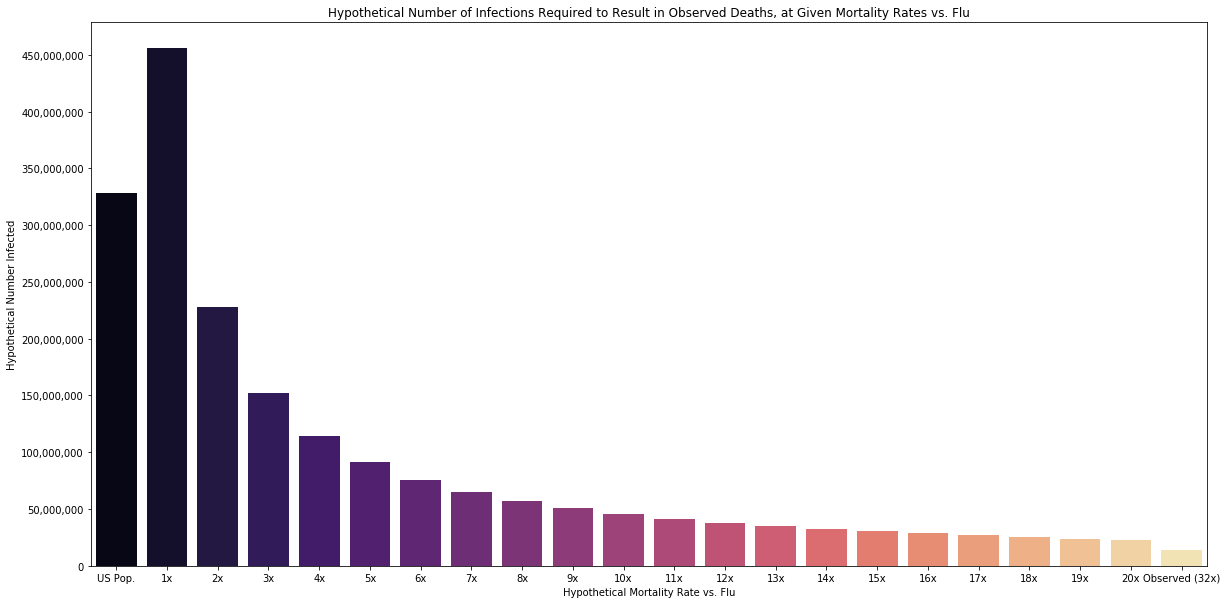

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=hypothetical_df.index, y='Hypothetical Number Infected', ax=ax, data=hypothetical_df, palette='magma')

y_labels=[]
for i in range(0,500000000,50000000):
    y_labels.append(i)
ax.set_yticks(y_labels)

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_xlabel('Hypothetical Mortality Rate vs. Flu')
ax.set_title('Hypothetical Number of Infections Required to Result in Observed Deaths, at Given Mortality Rates vs. Flu')

plt.show()

### <font color='royalblue'> Background #2: Disease Spread </font>

**Despite the fact that there have been fewer confirmed cases of COVID-19 YTD 2020 vs. cases of the flu during the 2019-2020 influenza season, there is also reason to believe that [COVID-19 is more infectious than the flu](https://www.cdc.gov/flu/symptoms/flu-vs-covid19.htm) when left unchecked.** *(Note that we also have annual flu shots that a good portion of the population receives, which reduces the spread of the flu right off the bat.)*

So COVID-19 seems to be deadlier and more easily spread than the flu. It also seems that people are contagious for longer with COVID-19 than with the flu (from same source), even if they are asymptomatic. While people with the flu are contagious for up to 7 days, the scientific evidence currently suggests people with COVID-19 are contagious for at least 10.

**How do these two factors (days infectious and mortality rate) contribute to the spread (or relative containment) of the two diseases?**

### <font color='darkcyan'> Tool #4: Animated Disease Spread</font>

We will use matplotlib animations to look at the theoretical spread of a disease within a population. Key points:
* 1000 People moving at "random walks" within a grid of a specified size
* 1 Person will be randomly infected with the disease (patient zero)
* At each time step, the disease will be spread to any healthy person within 1 coordinate of an infected person who is actively contagious
* At the end of each infected Person's contagious time period, they will randomly die according to the mortality rate specified
* We will run the simulation for 365 time steps

<font color='red'>NOTE: This is for demonstration purposes only. It is not intended to produce accurate scientific projections.</font>

#### Import necessary packages + prepare notebook for matplotlib animation

In [13]:
import random
import numpy as np
from matplotlib.animation import FuncAnimation

#### Create new class of object: "Person"

This person will have:
* Location (x and y coordinates; int)
* Infection status (Boolean)
* Alive status (Boolean)
* Number of people they have infected (int)
* Number of infectious days remaining (int)
* Disease mortality rate (float)
* Range of possible x and y coordinates (based on size of graph; list of ints)

Person will also have a method representing one time step
* this includes a random choice of step, if still alive (within confines of graph)
* if infected, then number of remaining infectious days is reduced by one
* if number of infectious days remaining is exactly zero, randomly decide whether person dies of disease, using mortality rate

Person also has a method enabling them to infect another instance of Person
* Can infect if you are infected, alive, still infectious (days infectious >0)
* Other Person must not yet be infected, and must have a location within 1 coordinate point of you (both x + y)
* If you infect other Person, +1 to your number of infected people count

In [14]:
class Person:
    
    def __init__(self, x_coordinate, y_coordinate, infected, alive, num_infected, days_infectious,
                 deathrate, x_range, y_range):
        
        self.x_coordinate = x_coordinate
        self.y_coordinate = y_coordinate
        self.infected = infected
        self.alive = alive
        self.num_infected = num_infected
        self.days_infectious = days_infectious
        self.deathrate = deathrate
        self.x_range = x_range
        self.y_range = y_range
        
    def __str__(self):
        return "Person at (" + str(self.x_coordinate) + ", " + str(self.y_coordinate) + \
               "); infected = " + str(self.infected) + " alive = " + str(self.alive)
    
    def time_step(self):
        
        '''
         Reflects events that occur in one passing of time; random choice of step, if still alive (within confines of graph);
         if infected, then number of remaining infectious days is reduced by one;
         if number of infectious days remaining is exactly zero, randomly decide whether person dies of disease,
         using mortality rate
        '''
        
        steps=[-1,0,1]
        x_step = random.choice(steps)
        y_step = random.choice(steps)
        
        if self.alive == True:
            if (self.x_coordinate + x_step <= self.x_range[1]) and (self.x_coordinate + x_step >= self.x_range[0]):
                self.x_coordinate = self.x_coordinate + x_step

            if (self.y_coordinate + y_step <= self.y_range[1]) and (self.y_coordinate + y_step >= self.y_range[0]):
                self.y_coordinate = self.y_coordinate + y_step

            if self.infected == True and self.days_infectious == 0:
                alive_chances = [True]*int(((1-self.deathrate)*1000))
                alive_chances.extend([False]*int((self.deathrate*1000)))
                self.alive = random.choice(alive_chances)
                self.days_infectious -= 1
            
            elif self.infected == True:
                self.days_infectious -= 1
    
    def infect(self,OtherPerson):
        
        '''
        Infect another instance of a Person: if you are infected, alive, still infectious (days infectious >0),
        and if the other person is not yet infected and within 1 coordinate of you (both x + y);
        add to your number of infected people count
        '''
        
        if self.infected == True and self.alive == True and self.days_infectious > 0 and OtherPerson.infected == False:
            if abs(OtherPerson.x_coordinate - self.x_coordinate) <= 1 and \
            abs(OtherPerson.y_coordinate - self.y_coordinate) <= 1:
                OtherPerson.infected = True
                self.num_infected += 1

#### Create Necessary Functions

* create_people() will allow us to create a list of Person objects and randomly infect one person (patient zero)
* start_details() will allow us to capture the positions and colors (dependent on infection status) of every Person in a list of Person objects
* one_time_step() will cycle a list of Person objects through one self.time_step(), capture the new positions, change and capture the new colors (dependent on infection status and alive status)
* scatter_results() takes a scatterplot and returns the number of People who are healthy, infected, and dead

In [15]:
def create_people(num_people,days_infectious,deathrate,x_range,y_range):
    
    '''
    create a list of Person objects and randomly infect one person (patient zero)
    '''
    
    Person_List = []
    
    for i in range(0,num_people):
        Person_List.append(
            Person(random.randint(x_range[0],x_range[1]),
                   random.randint(y_range[0],y_range[1]),
                   False,
                   True,
                   0,
                   days_infectious,
                   deathrate,
                   x_range,
                   y_range))
    
    patient_zero = random.randint(0,num_people-1)
    Person_List[patient_zero].infected = True
    return Person_List

In [16]:
def start_details(PersonList):
    
    '''
    capture the positions and colors (dependent on infection status) of every Person in a list of Person objects
    '''
    
    x_list = []
    y_list = []
    color_list = []
    
    for p in PersonList:
        x_list.append(p.x_coordinate)
        y_list.append(p.y_coordinate)
        color_list.append(0.1)
    
    return (np.c_[x_list,y_list], np.array(color_list))

In [17]:
def one_time_step(PersonList):
    
    '''
    cycle a list of Person objects through one self.time_step(), capture the new positions, change and capture the new colors
    (dependent on infection status and alive status)
    '''
    x_list = []
    y_list = []
    color_list = []
    
    # move all people in PersonList
    for p in PersonList:
        p.time_step()
        x_list.append(p.x_coordinate)
        y_list.append(p.y_coordinate)
    
        for other_p in PersonList:
            p.infect(other_p)
            
        if p.infected == True:
            if p.alive == False:
                color_list.append(0.9)
            else:
                color_list.append(0.5)
        else:
            color_list.append(0.1)
        
    return (np.c_[x_list,y_list], np.array(color_list))

In [18]:
def scatter_results(scatter):
    
    '''
    Takes a scatter with spread of disease results
    Returns number of people healthy/infected/dead
    '''
    final_status = scatter.get_array()
    
    num_people = len(final_status)
    num_healthy = 0
    num_infected = 0
    num_dead = 0

    for i in final_status:
        if i == 0.1:
            num_healthy += 1
        elif i == 0.5:
            num_infected += 1
        else:
            num_infected += 1
            num_dead += 1

    print('In this simulation, out of ' + str(num_people) + ' people:')
    print('\n')
    print(str(num_healthy) + ' remained healthy (' + str(round(num_healthy/num_people * 100,1)) +'%)')
    print(str(num_infected) + ' were infected (' + str(round(num_infected/num_people * 100,1)) +'%)')
    print(str(num_dead) + ' died (' + str(round(num_dead/num_people * 100,1)) +'%)')

    return (num_people, num_healthy, num_infected, num_dead)

#### Animate the spread of a disease with Flu-like attributes

In [ ]:
%matplotlib notebook
%matplotlib notebook

In [44]:
num_time_steps = 365
axes_range = [0,83]

List_Of_People_1 = create_people(num_people=1000,
                                 days_infectious=7,
                                 deathrate=0.0006,
                                 x_range=axes_range,
                                 y_range=axes_range)

People_1 = np.zeros(len(List_Of_People_1),dtype=[("position", int, 2),("color", float, 1)])
People_1["position"] = start_details(List_Of_People_1)[0]
People_1["color"] = start_details(List_Of_People_1)[1]  

print(People_1[0:5])

[([55, 18], 0.1) ([60, 36], 0.1) ([20, 25], 0.1) ([40, 29], 0.1)
 ([62,  4], 0.1)]


<IPython.core.display.Javascript object>


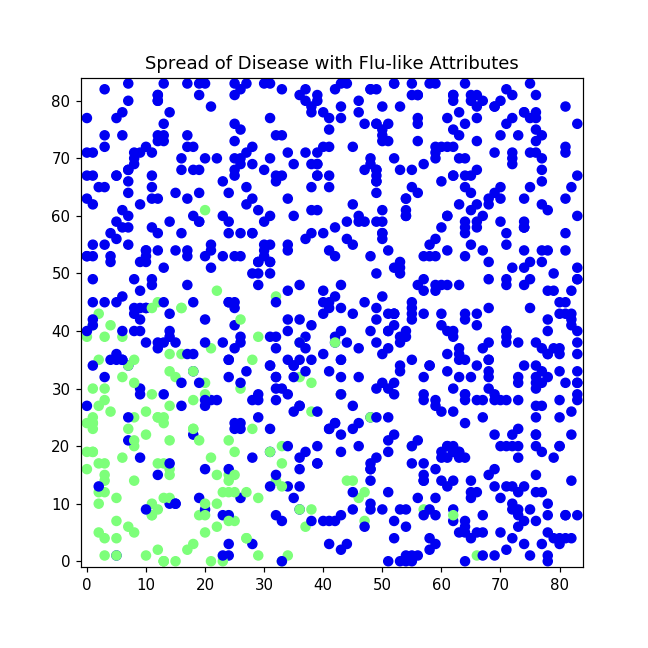

In [45]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set(xlim=(axes_range[0]-1, axes_range[1]+1), ylim=(axes_range[0]-1, axes_range[1]+1))
ax.set_title('Spread of Disease with Flu-like Attributes')
flu_scatter = ax.scatter(People_1["position"][:,0],
                         People_1["position"][:,1],
                         c=People_1["color"],
                         vmin=0,
                         vmax=1,
                         cmap="jet")

def update(frame_number):
    results = one_time_step(List_Of_People_1)
    flu_scatter.set_offsets(results[0])
    flu_scatter.set_array(results[1])
    return flu_scatter

anim1 = FuncAnimation(fig, update, frames = num_time_steps, interval=10, repeat = False)

In [46]:
scatter_results(flu_scatter)

In this simulation, out of 1000 people:


850 remained healthy (85.0%)
150 were infected (15.0%)
0 died (0.0%)


(1000, 850, 150, 0)

#### Animate the spread of a disease with COVID-19-like attributes

In [42]:
num_time_steps = 365
axes_range = [0,83]

List_Of_People_2 = create_people(num_people=1000,
                                 days_infectious=10,
                                 deathrate=0.006,
                                 x_range=axes_range,
                                 y_range=axes_range)

People_2 = np.zeros(len(List_Of_People_2),dtype=[("position", int, 2),("color", float, 1)])
People_2["position"] = start_details(List_Of_People_2)[0]
People_2["color"] = start_details(List_Of_People_2)[1]  

print(People_2[0:5])

[([54, 64], 0.1) ([26, 36], 0.1) ([ 5, 78], 0.1) ([23,  3], 0.1)
 ([57, 11], 0.1)]


<IPython.core.display.Javascript object>


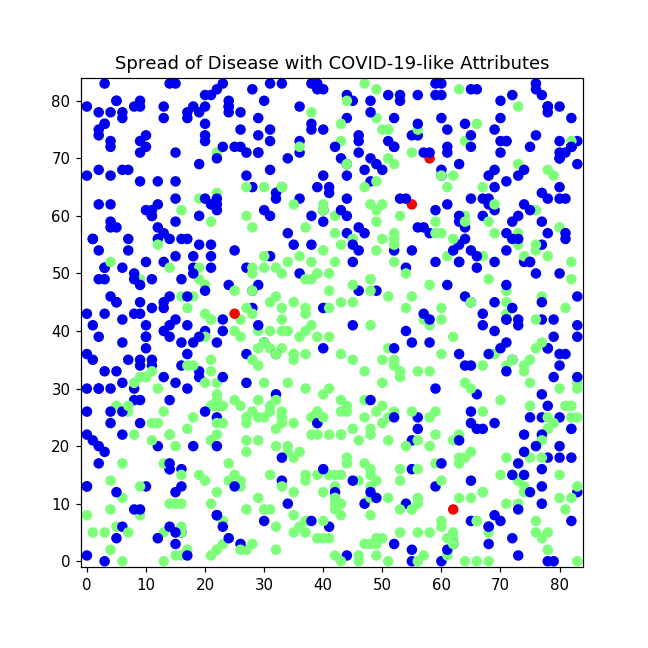

In [43]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set(xlim=(axes_range[0]-1, axes_range[1]+1), ylim=(axes_range[0]-1, axes_range[1]+1))
ax.set_title('Spread of Disease with COVID-19-like Attributes')
covid_scatter = ax.scatter(People_2["position"][:,0],
                           People_2["position"][:,1],
                           c=People_2["color"],
                           vmin=0,
                           vmax=1,
                           cmap="jet")

def update(frame_number):
    results = one_time_step(List_Of_People_2)
    covid_scatter.set_offsets(results[0])
    covid_scatter.set_array(results[1])
    return covid_scatter

anim2 = FuncAnimation(fig, update, frames = num_time_steps, interval=10, repeat = False)

In [47]:
scatter_results(covid_scatter)

In this simulation, out of 1000 people:


526 remained healthy (52.6%)
474 were infected (47.4%)
4 died (0.4%)


(1000, 526, 474, 4)

#### Let's take that simulated population mortality rate and multiply it by the US population

Note: each time the simulation is run, the results will differ. The spread of the disease depends upon the location of Patient Zero, the random walks of the People around Patient Zero, and random deaths based on the mortality rate specified (in this case 0.6%)

This is not a problem, really, as the spread of disease in real life similarly depends on the location of Patient Zero, movement of the global population, and the ever changing mortality rate of the disease

In [48]:
print('Using the population mortality rate of this simulation, with unfettered spread of the disease ' + '{:,}'.format(int(round(.004*328200000,0))) +' people would die')

Using the population mortality rate of this simulation, with unfettered spread of the disease 1,312,800 people would die


In [51]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abode118/covid-flu-final" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/abode118/covid-flu-final


'https://jovian.ai/abode118/covid-flu-final'